In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 999

!pip install --upgrade tables
!pip install memory_profiler

import memory_profiler
%load_ext memory_profiler

Requirement already up-to-date: tables in /usr/local/lib/python3.6/site-packages (3.6.1)
  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-py3-none-any.whl size=28992 sha256=696402a8d55e0be0bf3b3a5392d4a719c56410a1c248b14b0303f11325560945
  Stored in directory: /root/.cache/pip/wheels/75/72/f3/ea9ac04a4cac6495412f33f260920a97e1eb185cbd3c839880
Successfully built memory-profiler


# IMPORT DATA

In [0]:
%%time
!wget https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv

--2020-05-21 19:21:27--  https://data.cityofnewyork.us/api/views/qgea-i56i/rows.csv
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv’

rows.csv                [        <=>         ]   2.14G  4.57MB/s    in 9m 6s   

2020-05-21 19:30:34 (4.02 MB/s) - ‘rows.csv’ saved [2301014435]

CPU times: user 2.47 s, sys: 679 ms, total: 3.15 s
Wall time: 9min 7s


## PANDAS READ

Odczytujemy dane przez pandas

In [0]:
%%time
data = pd.read_csv('rows.csv')

# for c in data.select_dtypes(include=['object']).columns:
#     data[c] = data[c].astype(str)

data.info()

<string>:2: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7309655 entries, 0 to 7309654
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [0]:
import gc
gc.collect()

174

In [0]:
%%time
data.to_csv('rows_2.csv')

CPU times: user 2min 13s, sys: 3.69 s, total: 2min 16s
Wall time: 2min 17s


In [0]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,NaN,NaN,43.0,08/30/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1018029.0,240747.0,NaN,UNKNOWN,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,11/05/2006,17:40:00,66.0,11/05/2006,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,982556.0,171385.0,NaN,NaN,NaN,NaN,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
2,631420068,09/08/2006,23:30:00,09/09/2006,00:01:00,106.0,09/09/2006,347,INTOXICATED & IMPAIRED DRIVING,905.0,"INTOXICATED DRIVING,ALCOHOL",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1028213.0,186786.0,NaN,NaN,NaN,NaN,40.679260,-73.841500,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,E
3,995609899,12/13/2011,18:40:00,12/13/2011,18:49:00,79.0,12/13/2011,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000788.0,189718.0,NaN,NaN,NaN,NaN,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,480667624,08/14/2009,04:20:00,NaN,NaN,30.0,08/14/2009,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000029.0,242245.0,NaN,NaN,NaN,NaN,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E


In [0]:
%%time

data.groupby(['OFNS_DESC']).count()

CPU times: user 9.44 s, sys: 1.27 s, total: 10.7 s
Wall time: 10.7 s


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
OFNS_DESC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABORTION,7,7,7,5,5,7,7,7,7,7,7,7,7,7,7,7,7,0,1,1,7,7,4,4,4,0,7,7,7,7,0,7,7,7
ADMINISTRATIVE CODE,16170,16166,16170,12125,12143,16170,16170,16170,16170,16170,16170,16170,16160,14749,16138,16170,16170,53,390,655,15370,15370,6455,12334,12143,248,15370,15370,15370,16170,248,13220,16168,16168
ADMINISTRATIVE CODES,19,19,19,16,16,19,19,19,19,19,19,19,19,12,19,19,19,0,0,1,19,19,3,4,4,0,19,19,19,19,0,3,19,19
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,714,714,714,579,580,714,714,714,714,714,714,714,714,610,714,714,714,27,62,91,625,625,439,455,455,0,625,625,625,714,0,678,714,714
ALCOHOLIC BEVERAGE CONTROL LAW,1307,1307,1307,1007,1007,1307,1307,1307,1307,1307,1307,1307,1307,1241,1306,1307,1307,19,4,12,1209,1209,533,609,591,5,1209,1209,1209,1307,5,579,1306,1306
ANTICIPATORY OFFENSES,119,119,119,89,89,119,119,119,119,119,119,119,119,87,116,119,119,1,3,5,114,114,32,36,35,3,114,114,114,119,3,47,119,119
ARSON,17335,17332,17335,9196,9203,17335,17335,17335,17335,17335,17335,17335,17316,15626,17281,17335,17335,8,3048,4582,16820,16820,1538,2903,2504,34,16820,16820,16820,17335,34,5396,17327,17327
ASSAULT 3 & RELATED OFFENSES,770997,770953,770996,574131,574636,770976,770997,770997,770997,770997,770997,770997,770483,622687,768618,770997,770997,3121,53276,80494,731692,731692,378435,542981,533167,14329,731692,731692,731692,770973,14329,741379,770992,770992
BURGLAR'S TOOLS,3861,3861,3861,3189,3189,3861,3861,3861,3861,3861,3861,3861,3855,2198,3842,3861,3861,12,62,109,3638,3638,1438,1448,1444,486,3638,3638,3638,3861,486,1821,3861,3861


In [0]:
%%timeit -n 15
data['OFNS_DESC'].value_counts()

15 loops, best of 3: 783 ms per loop


In [0]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [0]:
%prun sum_of_lists(1000000)

# BENCHMARK

In [0]:
!pip install memory_profiler
import memory_profiler

In [0]:
gc.collect()
start = memory_profiler.memory_usage()[0]
a = np.random.rand(100000000)
print(memory_profiler.memory_usage()[0],memory_profiler.memory_usage()[0]-start)

8921.046875 0.0


Run number: 0
Format csv -> test_0_csv
Format pickle -> test_0_pickle
Format hdf -> test_0_hdf
Format feather -> test_0_feather
Format pyarrow -> test_0_pyarrow


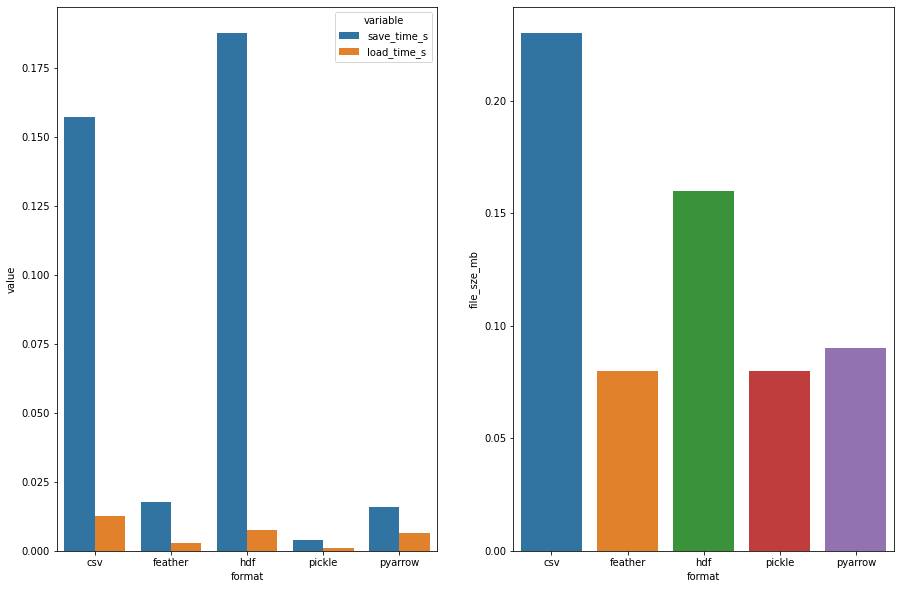

In [0]:
from tqdm import tqdm
from collections import defaultdict
import os
import gc
from timeit import default_timer
import time


def size_of(filename, unit=1024**2):
    return round(os.stat(filename).st_size / unit, 2)

def benchmark(df, formats, n = 1):
    results = []
    for i in range(n):
        print(f'Run number: {i}')
        for f in formats:
            result = defaultdict(int)
            filename = f'test_{i}_{f["name"]}'

            result["loop"] = i
            result["format"] = f["name"]

            print(f'Format {f["name"]} -> {filename}')

            # Save
            start = default_timer()
            f['save'](df, filename)
            result["save_time_s"] = default_timer() - start

            # Load
            start = default_timer()
            load = f['load'](filename)
            result["load_time_s"] = default_timer() - start
            result["file_sze_mb"] = size_of(filename)

            results.append(result)

            del load
            gc.collect()

    results = pd.DataFrame(results)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 10))

    avg_result = results.groupby('format').mean().reset_index()
    time = avg_result[['save_time_s','load_time_s','format']].melt(id_vars='format')

    sns.barplot(x='format',y='value',data=time, hue='variable', ax=ax1)
    sns.barplot(x='format',y='file_sze_mb',data=avg_result, ax=ax2)
    plt.show()

    return pd.DataFrame(results)


df = pd.DataFrame({"A": np.random.rand(10000)})

formats = [
          { 'name': "csv", "save": lambda df, filename: df.to_csv(filename), "load": lambda filename: pd.read_csv(filename)},
          { 'name': "pickle", "save": lambda df, filename: df.to_pickle(filename), "load": lambda filename: pd.read_pickle(filename)},
           { 'name': "hdf", "save": lambda df, filename: df.to_hdf(filename,key='table',mode='w'), "load": lambda filename: pd.read_hdf(filename,key='table')},
          # REMOVED IN THE VERSION 1.0
          #  { 'name': "msgpack", "save": lambda df, filename: df.to_msgpack(filename), "load": lambda filename: pd.read_msgpack(filename)},
          { 'name': "feather", "save": lambda df, filename: df.to_feather(filename), "load": lambda filename: pd.read_feather(filename)},
          { 'name': "pyarrow", "save": lambda df, filename: df.to_parquet(filename,engine='pyarrow'), "load": lambda filename: pd.read_parquet(filename)},
          ]

results = benchmark(df,formats, n = 1)    

Run number: 0
Format csv -> test_0_csv
Format pickle -> test_0_pickle
Format hdf -> test_0_hdf
Format feather -> test_0_feather
Format pyarrow -> test_0_pyarrow
Run number: 1
Format csv -> test_1_csv
Format pickle -> test_1_pickle
Format hdf -> test_1_hdf
Format feather -> test_1_feather
Format pyarrow -> test_1_pyarrow
Run number: 2
Format csv -> test_2_csv
Format pickle -> test_2_pickle
Format hdf -> test_2_hdf
Format feather -> test_2_feather
Format pyarrow -> test_2_pyarrow


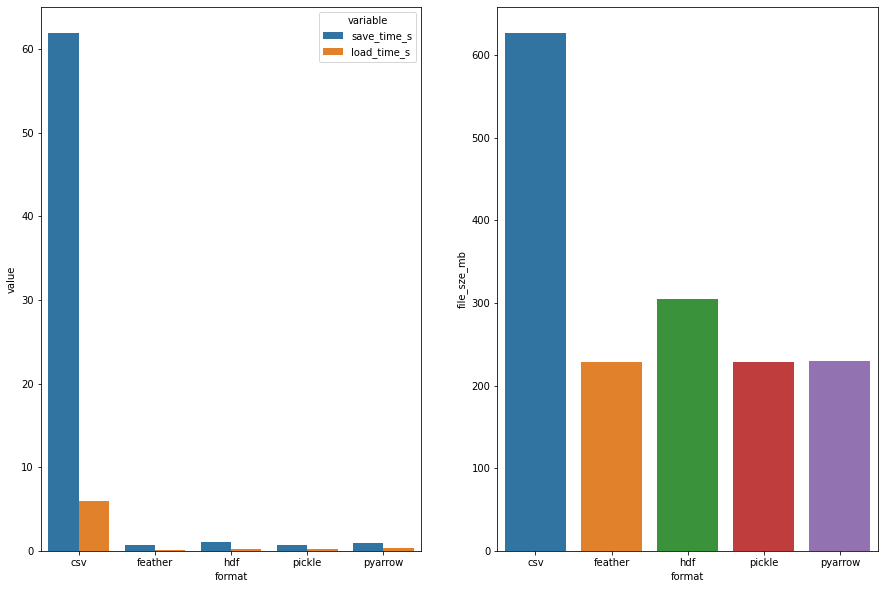

In [0]:
size = 10000000
df = pd.DataFrame({"A": np.random.rand(size), "B": np.random.rand(size), "C": np.random.rand(size)})

results = benchmark(df,formats, n = 3)   

In [0]:
results.groupby('format').mean()

,loop,save_time_s,load_time_s,file_sze_mb
format,,,,
csv,1,61.941748,5.976824,626.55
feather,1,0.711539,0.093817,228.88
hdf,1,1.062077,0.254744,305.18
pickle,1,0.645497,0.190404,228.88
pyarrow,1,0.967727,0.336808,229.71


Run number: 0
Format pickle -> test_0_pickle
Format hdf -> test_0_hdf
Format feather -> test_0_feather
Format pyarrow -> test_0_pyarrow
Run number: 1
Format pickle -> test_1_pickle
Format hdf -> test_1_hdf
Format feather -> test_1_feather
Format pyarrow -> test_1_pyarrow
Run number: 2
Format pickle -> test_2_pickle
Format hdf -> test_2_hdf
Format feather -> test_2_feather
Format pyarrow -> test_2_pyarrow


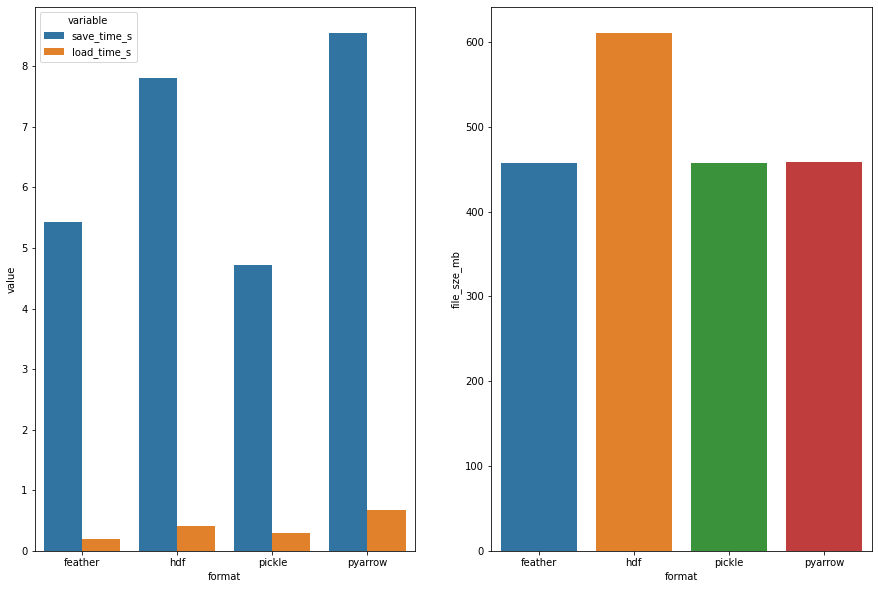

In [0]:
formats = [
          ## { 'name': "csv", "save": lambda df, filename: df.to_csv(filename), "load": lambda filename: pd.read_csv(filename)},
          { 'name': "pickle", "save": lambda df, filename: df.to_pickle(filename), "load": lambda filename: pd.read_pickle(filename)},
           { 'name': "hdf", "save": lambda df, filename: df.to_hdf(filename,key='table',mode='w'), "load": lambda filename: pd.read_hdf(filename,key='table')},
          # REMOVED IN THE VERSION 1.0
          #  { 'name': "msgpack", "save": lambda df, filename: df.to_msgpack(filename), "load": lambda filename: pd.read_msgpack(filename)},
          { 'name': "feather", "save": lambda df, filename: df.to_feather(filename), "load": lambda filename: pd.read_feather(filename)},
          { 'name': "pyarrow", "save": lambda df, filename: df.to_parquet(filename,engine='pyarrow'), "load": lambda filename: pd.read_parquet(filename)},
          ]

size = 20000000
df = pd.DataFrame({"A": np.random.rand(size), "B": np.random.rand(size), "C": np.random.rand(size)})

results = benchmark(df,formats, n = 3)   

In [0]:
results.groupby('format').mean()

,loop,save_time_s,load_time_s,file_sze_mb
format,,,,
feather,1,5.425000,0.187208,457.76
hdf,1,7.806548,0.412957,610.36
pickle,1,4.719581,0.299037,457.76
pyarrow,1,8.549885,0.669223,458.62


# PANDAS: NYC BENCHMARK

In [0]:
formats = [
          ## { 'name': "csv", "save": lambda df, filename: df.to_csv(filename), "load": lambda filename: pd.read_csv(filename)},
          { 'name': "pickle", "save": lambda df, filename: df.to_pickle(filename), "load": lambda filename: pd.read_pickle(filename)},
           { 'name': "hdf", "save": lambda df, filename: df.to_hdf(filename,key='table',mode='w'), "load": lambda filename: pd.read_hdf(filename,key='table')},
          # REMOVED IN THE VERSION 1.0
          #  { 'name': "msgpack", "save": lambda df, filename: df.to_msgpack(filename), "load": lambda filename: pd.read_msgpack(filename)},
          { 'name': "feather", "save": lambda df, filename: df.to_feather(filename), "load": lambda filename: pd.read_feather(filename)},
          { 'name': "pyarrow", "save": lambda df, filename: df.to_parquet(filename,engine='pyarrow'), "load": lambda filename: pd.read_parquet(filename)},
          ]

results = benchmark(data,formats, n = 1) 

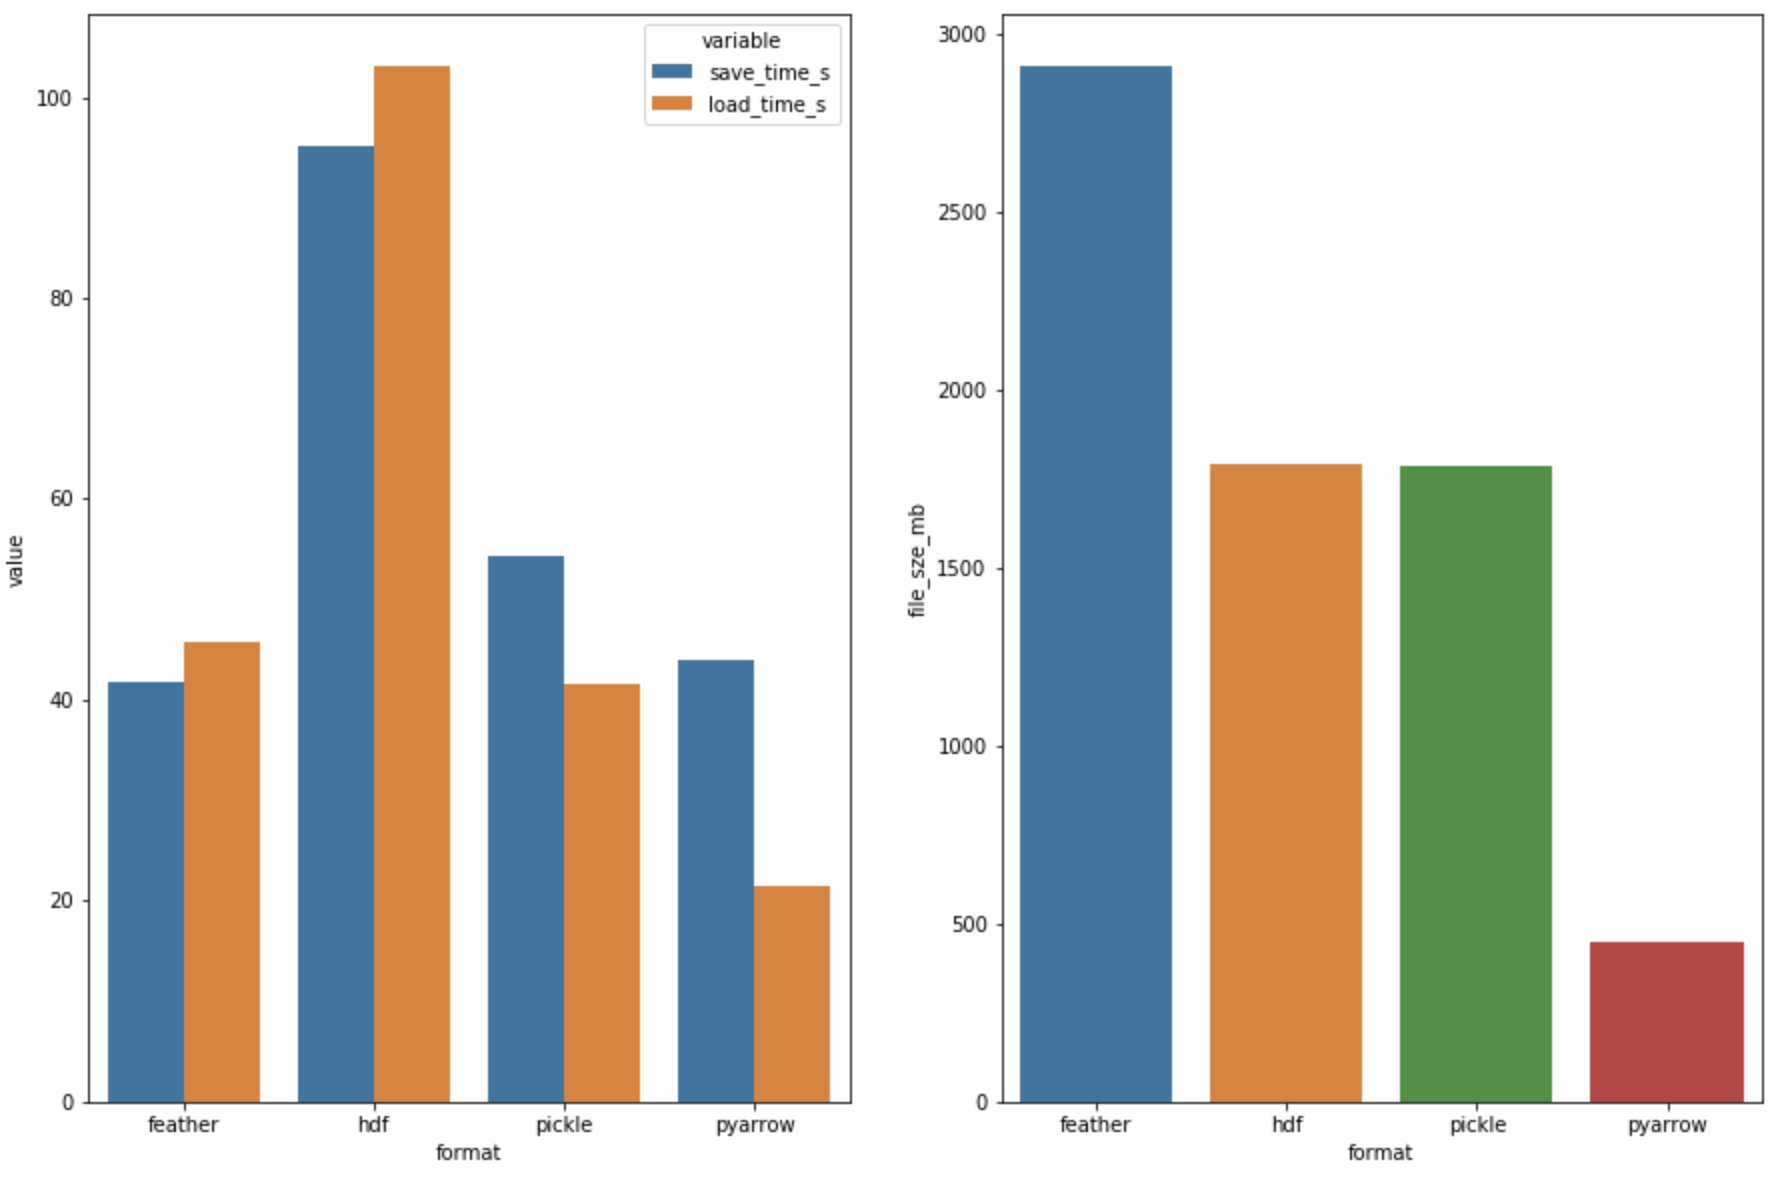

## PANDAS PROFILER

In [0]:
!pip install memory_profiler
import memory_profiler
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


### Checking number of missing rows

In [0]:
df = data
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,522575447,08/29/2006,13:00:00,NaN,NaN,43.0,08/30/2006,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1018029.0,240747.0,NaN,UNKNOWN,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,F
1,403507361,11/05/2006,11:00:00,11/05/2006,17:40:00,66.0,11/05/2006,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,982556.0,171385.0,NaN,NaN,NaN,NaN,40.637097,-74.006105,"(40.637096864, -74.006105014)",PATROL BORO BKLYN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
2,631420068,09/08/2006,23:30:00,09/09/2006,00:01:00,106.0,09/09/2006,347,INTOXICATED & IMPAIRED DRIVING,905.0,"INTOXICATED DRIVING,ALCOHOL",COMPLETED,MISDEMEANOR,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1028213.0,186786.0,NaN,NaN,NaN,NaN,40.679260,-73.841500,"(40.679260229, -73.841500185)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,E
3,995609899,12/13/2011,18:40:00,12/13/2011,18:49:00,79.0,12/13/2011,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000788.0,189718.0,NaN,NaN,NaN,NaN,40.687402,-73.940369,"(40.687401619, -73.940369194)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,480667624,08/14/2009,04:20:00,NaN,NaN,30.0,08/14/2009,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000029.0,242245.0,NaN,NaN,NaN,NaN,40.831576,-73.942983,"(40.831576128, -73.942982699)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E


In [0]:
%memit
%time
_ = df.isnull().sum();

peak memory: 10335.17 MiB, increment: 0.02 MiB
CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 7.39 µs


### Counting number of crimes (basing on KY_CD)


In [0]:
%memit
%time
_ = df.groupby('KY_CD').size();

peak memory: 10418.28 MiB, increment: 0.02 MiB
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [0]:
# %memit
%time
a = df.groupby(['KY_CD','CMPLNT_NUM','JURIS_DESC']).sum().sum().sum();
print(a)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
8450204831888.37


# DASK

In [0]:
import dask
import dask.dataframe as dd

In [0]:
with open('./rows.csv') as file:
    header = file.readline()

headers = header.split(',')
dtypes = dict()
for header in headers:
    dtypes[header] = 'str'

In [0]:
%%time
df = dd.read_csv('rows.csv',dtype=dtypes)
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 35 entries, CMPLNT_NUM to VIC_SEX
dtypes: object(35)CPU times: user 94.6 ms, sys: 1.83 ms, total: 96.5 ms
Wall time: 100 ms


In [0]:
df.head()

## DASK: NYC BENCHMARK

Run number: 0
Format csv -> test_0_csv
Format pyarrow -> test_0_pyarrow


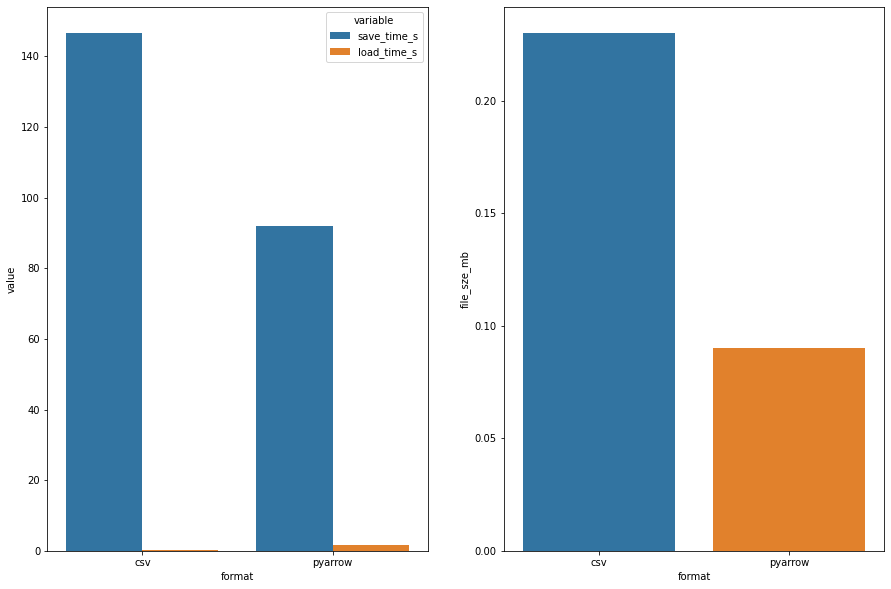

In [0]:
formats = [
           { 'name': "csv", "save": lambda df, filename: df.to_csv('dd2'+filename, single_file=True), "load": lambda filename: dd.read_csv('dd2'+filename)},
          ## { 'name': "pickle", "save": lambda df, filename: df.to_pickle(filename), "load": lambda filename: dd.read_pickle(filename)},
          #  { 'name': "hdf", "save": lambda df, filename: df.to_hdf('dd'+filename,key='table',mode='w'), "load": lambda filename: dd.read_hdf('dd'+filename,key='table')},
          # REMOVED IN THE VERSION 1.0
          #  { 'name': "msgpack", "save": lambda df, filename: df.to_msgpack(filename), "load": lambda filename: pd.read_msgpack(filename)},
          # { 'name': "feather", "save": lambda df, filename: df.to_feather('dd'+filename), "load": lambda filename: dd.read_feather('dd'+filename)},
          { 'name': "pyarrow", "save": lambda df, filename: df.to_parquet('dd'+filename,engine='pyarrow'), "load": lambda filename: dd.read_parquet('dd'+filename)},
          ]

results = benchmark(df,formats, n = 1) 

### Counting number of crimes (basing on KY_CD)

In [0]:
%memit
%time
%timeit

df_dask = dd.read_csv(r'./rows.csv', dtype = dtypes)

UsageError: Line magic function `%memit` not found.


## Checking number of missing rows

In [0]:
%memit
%time
%timeit
df_dask.isnull().sum().compute();

peak memory: 8553.44 MiB, increment: 0.02 MiB
CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 10.5 µs


### Counting number of crimes (basing on KY_CD)


In [0]:
%memit
%time
%timeit
df_dask.groupby('KY_CD').size().compute();

peak memory: 7705.15 MiB, increment: 0.01 MiB
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.2 µs


In [0]:
%memit
%time
%timeit
df_dask.groupby('KY_CD').sum().compute();

peak memory: 7702.19 MiB, increment: 0.00 MiB
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


## DASK SERVER

In [0]:
from distributed import Client, LocalCluster

In [0]:
localCluster = LocalCluster()
client = Client(localCluster)
client

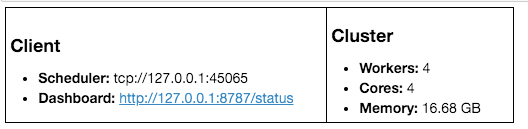

In [0]:
%memit
%time
%timeit
df_dask = dd.read_csv(r'./rows.csv', dtype = dtypes)

In [0]:
%memit
%time
%timeit
df_dask.isnull().sum().compute();

In [0]:
%memit
%time
%timeit
df_dask.groupby('KY_CD').size();

# MODIN


https://towardsdatascience.com/get-faster-pandas-with-modin-even-on-your-laptops-b527a2eeda74

In [0]:
!pip install modin

In [0]:
!pip install modin[dask]

In [0]:
import modin.pandas as pd_modin

In [0]:
with open('./rows.csv') as file:
    header = file.readline()

headers = header.split(',')
dtypes = dict()
for header in headers:
    dtypes[header] = 'str'

In [0]:
%time

df_modin = pd_modin.read_csv(r'./rows.csv', dtype = dtypes)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


In [0]:
%memit
%time
%timeit

_ = df_modin.isnull().sum();

peak memory: 3021.71 MiB, increment: 0.10 MiB
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


In [0]:
%memit
%time
%timeit
df_modin.groupby('KY_CD').size();

peak memory: 5847.29 MiB, increment: -287.84 MiB
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs


distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker exceeded 95% memory budget. Restarting
distributed.scheduler - ERROR - Couldn't gather keys {'apply_list_of_funcs-57d07ba8-bd8a-4418-baef-cb1c945fca41': ['tcp://127.0.0.1:46455']} state: ['memory'] workers: ['tcp://127.0.0.1:46455']
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://127.0.0.1:46455'], apply_list_of_funcs-57d07ba8-bd8a-4418-baef-cb1c945fca41
NoneType: None
distributed.client - WARNING - Couldn't gather 1 keys, rescheduling {'apply_list_of_funcs-57d07ba8-bd8a-4418-baef-cb1c945fca41': ('tcp://127.0.0.1:46455',)}
distributed.nanny - WARNING - Restarting worker


In [0]:
%memit
%time
%timeit
_ = df_modin.groupby('KY_CD').size();

peak memory: 3023.76 MiB, increment: 0.11 MiB
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


# CUDF

Tą sekcje radzę uruchamia oddzielnie.

https://rapids.ai/start.html

In [0]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 103 (delta 21), reused 14 (delta 1), pack-reused 0
Receiving objects: 100% (103/103), 30.32 KiB | 4.33 MiB/s, done.
Resolving deltas: 100% (21/21), done.
PLEASE READ
********************************************************************************************************
Changes:
1. Now that most people have migrated, we have rem0ved the migration notice.
2. default stable version is now 0.13.  Nightly is now 0.14
3. You can now declare your RAPIDS version as a CLI option and skip the user prompts (ex: '0.13' or '0.14', between 0.11 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.13', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rapidsai-csp-utils/colab/

In [0]:
import cudf as pd_cudf
!nvidia-smi

Thu May 21 19:21:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
with open('./rows.csv') as file:
    header = file.readline()

headers = header.split(',')
dtypes = dict()
for header in headers:
    dtypes[header] = 'str'

In [0]:
%time

df_cudf = pd_cudf.read_csv(r'./rows.csv', dtype = dtypes)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


RuntimeError: ignored